
## FINANCIAL ECONOMETRICS
MODULE 3 | LESSON 4

---

# **JOINT PROBABILITY, MARGINAL PROBABILITY AND COPULA**

|  |  |
|:---|:---|
|**Reading Time** | 90 minutes |
|**Prior Knowledge** | Basic Statistics  |
|**Keywords** | Joint Probability, Marginal Probability, Inverse Function, Copula, Probability Integral Transformation, Sklar's Theorem, <br> Invariance Under Monotonic, Transformation, Strictly Increasing Function, Comonotonicity, Counter monotonicity, Upper Tail Dependence, <br> Lower Tail Dependence, Elliptical Copula, Normal Copula/Gaussian Copula, Student-t Copula, Archimedean Copula, Clayton Copula, Gumbel Copula |


---

*So far, we have talked about probability functions and cumulative probability functions for one random variable (univariate distribution). In this lesson, we are going to explore probability distributions for more than one variable. We will start with two random variables (bivariate distributions). With a solid understanding of bivariate distributions, we can easily extend the theories to multiple random variables (multivariate distributions). At the beginning of the lesson, we will review the concept of joint distribution and marginal distribution. Then, we will move to introduce copulas. A copula is a function to link marginal distributions with joint cumulative distributions. Copulas have been a popular tool in risk management in finance. We will go over the basics of copulas and introduce commonly used copula functions. We will finish the lesson with an example showing how to fit a copula model.*

In [1]:
# Load libraries
import copulae
import matplotlib.pyplot as plt
import pandas as pd
import pycop
import numpy as np
from copulae import pseudo_obs
from copulae.archimedean import ClaytonCopula, GumbelCopula
from copulae.elliptical import GaussianCopula, StudentCopula
from copulae.gof.goodness_of_fit import gof_copula
from copulas.multivariate import GaussianMultivariate
from scipy.stats import kendalltau


plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
# Download the dataset
data_set = pd.read_csv("M3/M3. bond_and_stock_data.csv")

## **1. Joint Probability Distribution and Marginal Probability Distribution**

Oftentimes, we would like to understand the probability of two variables happening at the same time. For example, we would like to know the distribution of both time spent studying and the grades of high school students. Usually, there is a relationship between time spent studying and grades. We would think students who study more may also have higher grades. Hence, the probability of time spent studying and grades is not simply the sum of the probability of time spent studying and the probability of grades. 

From the above example, we will need a joint probability distribution for time spent studying and grades. A joint probability distribution is a function to determine the probability of a joint outcome of two random variables. We can write a joint probability distribution function as follows:

Let $X_{1}, X_{2}, \cdots, X_{d}$ be random variables, so their joint probability distribution function would be:

$$ f(X_{1}, X_{2}, \cdots, X_{d}) = P(X_{1}=x_{1}, X_{2}=x_{2}, \cdots, X_{d}=x_{d}) $$

For example, a joint probability distribution for amount of studying time and grades will give joint probability of the event when study time = 20 hours and grade = 70. For continuous random variables, the joint probability function is called joint probability density function (joint PDF or joint density function). For discrete random variables, the joint probability function is called joint probability mass function (joint PMF or joint mass function). For two random variables, the joint probability distribution is also called bivariate joint probability distribution.

Given a joint distribution of time spent studying and grades, what if we just want to look at the distribution for grades? Then, we will need the marginal probability distribution of grades without study time. A marginal probability distribution is a function to give the probability of grades without study time. Let $X_{1}, X_{2}, \cdots, X_{d}$ be random variables. We can write their marginal probability distribution functions as follows:

$$ \begin{cases} 
  f_{X_{1}}(x_{1}) = P(X_{1} = x_{1}) \\
  f_{X_{2}}(x_{2}) = P(X_{2} = x_{2}) \\
  \quad \vdots \\
  f_{X_{d}}(x_{d}) = P(X_{d} = x_{d})
\end{cases} $$

For continuous random variables, the marginal probability function is called marginal probability density function (marginal PDF or marginal density function). For discrete random variables, the joint probability function is called marginal probability mass function (marginal PMF or marginal mass function).

We can use the joint probability distribution of studying time and grades to find the marginal probability distribution for grades. The required reading for joint distribution and marginal distribution will provide the detailed process, proof, properties, and examples of joint probability functions and marginal probability functions.

With a joint distribution function, we can also derive the joint cumulative probability distribution function (joint CDF) as follows. 

Let $X_{1}, X_{2}, \cdots, X_{d}$ be random variables, 

$$ F(X_{1}, X_{2}, \cdots, X_{d}) = P(X_{1} \le x_{1}, X_{2} \le x_{2},\cdots, X_{d} \le x_{d}) $$

Sometimes, a distribution function can also mean cumulative probability distribution function (CDF), and a density function means probability distribution function. As such, be careful to understand the term correctly when reading the content.

With a marginal probability distribution, we can also derive the marginal cumulative probability distribution and vice versa. Let $X_{1}, X_{2}, \cdots, X_{d}$ be random variables. We can write their marginal cumulative probability distribution functions as follows:

$$ \begin{cases} 
  F_{X_{1}}(x_{1}) = P(X_{1}\le  x_{1}) \\
  F_{X_{2}}(x_{2}) = P(X_{2}\le x_{2}) \\
  \quad \vdots \\
  F_{X_{d}}(x_{d}) = P(X_{d}\le x_{d})
\end{cases} $$

There is one key property of the joint distribution to emphasize. Joint distribution contains information about the random variables' marginal distributions and their dependence structure. In the following sections, we will explore the relationship among joint distribution, marginal distribution, and random variables' dependence structure more.

Before we close this section, we'll introduce another concept: inverse function.

When we have a continuous function $f(X)=Y$, it means $f(\cdot)$ maps $X$ to $Y$. How about if we want to map $Y$ to $X$? Then, we need an inverse function of $f(\cdot)$. What is an inverse function? 

Assume we have a continuous function $f(X)=Y$. If there is a continuous function $g(X)$ such that $g(f(X)) = g(Y) = X$ for all $X$ and $Y$, then we say $f(\cdot)$ is invertible. The inverse function of $f(X)$ is denoted as $f(Y)^{-1}$. Figure 1 is a graphical depiction of the relationship of a function and its inverse function.

In the above definition, we only look at $f(X)$ and $g(Y)$, which are continuous functions. There will be some variation if one of them is not continuous. We will not cover this topic in this lesson.


**Figure 1: Illustration of a Function $f(X)$ and Its Inverse Function $f(Y)^{-1}$**

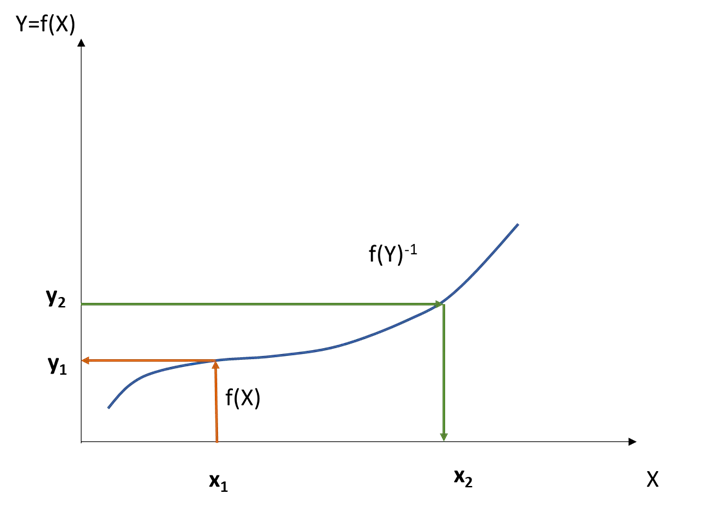


Be careful not to confuse inverse function $f(X)^{-1}$ with the reciprocal of $f(X)$. Inverse Function $f(x)^{-1} eq \frac{1}{f(x)}$. We will use the inverse function concept later in this lesson.


## **2. Basics of Copulas**

### **2.1 What is a Copula?**

In many research projects, we usually need to handle several random variables and find their joint distribution for analysis. For example, in risk management, there's market risk, credit risk, event risk, etc. Usually, we can investigate the market risk and find a distribution that fits the data best. We can do the same thing and find a distribution for each individual risk. However, if we want to analyze all these risks together, how can we find their joint distribution? This is where the concept of a **copula** can help.

A copula is a function that can take the marginal cumulative function of each random variable as input and generate a joint cumulative distribution. Copulas can also estimate the dependence structure of input random variables. You can put in as many marginal distributions from random variables and their correlations as you like. Remember that at the end of the previous section, we mentioned that a joint distribution contains information on the marginal distribution of each random variable and the dependence structure among random variables. However, modeling a joint distribution directly has always been a difficult task in research. With a copula function, we can fit the joint distribution function and estimate the dependence structure of input random variables. That is why copulas have been very popular recently in high-dimensional data analysis. We can summarize what a copula is in the following way:

Assuming $X$ and $Y$ are two continuous random variables, the bivariate joint cumulative distribution of $X$ and $Y$ can be written as follows:

$$ H(X,Y) = C(F(X), F(Y)) $$

> $H(\cdot)$: joint cumulative function <br>
> $F(\cdot)$: marginal distribution function <br>
> $C(\cdot)$: Copula function <br>


### **2.2 Definition and Theorems of Copulas**

In the last section, we described what a copula is. In this section, we are getting a bit more technical. We will go over a more precise definition for a copula and its theorems.


#### **2.2.1 Copula Definition**

A copula is a $d$-dimensional joint cumulative distribution function of uniform random variables $(u_1, u_2, \cdots, u_d)$ with a range between $0$ and $1$. Here are the propositions that define a copula function:

> 1.  $C(U) = C(u_1, u_2, \cdots, u_d)$  where $u_i$ is a uniform marginal distribution.
> 2. $C(u_1, u_2, \cdots, u_d) : [0,1]^d \to [0,1]$. This means $C(u_1, u_2, \cdots, u_d)$ is defined in a $d$-dimensional hypercube space between $0$ and $1$. $C(u_1, u_2, \cdots, u_d)$ maps the $d$-dimensional cubic space to a range between $0$ and $1$.
> 3. $C(u_1, u_2, \cdots, u_{i-1}, 0, u_{i+1}, \cdots, u_d) = 0$ if any component in $C(\cdot)$ is $0$.
> 4. $C(1, 1, \cdots, ,u_i, \cdots, 1, 1) = u_i$ if all other components except $u_i$ are $1$.
> 5. $C(\cdot)$ must increase or stay the same when any of the components increases. $C(\cdot)$ is a non-decreasing function for each component.
> 6. $C(\cdot)$ must increase or stay the same when all components increase or stay the same (none of them decrease) at the same time. This is also called rectangular inequality or $n$-increasing.

Propositions 1 and 2 tell us that a copula is a joint cumulative function for uniform random variables with a range between $0$ and $1$. Propositions 3–6 are all rules to set up a copula function so that the copula function behaves like a joint uniform cumulative function.

Please read the required reading for uniform distribution to learn more details about this distribution.

Before moving on to the next topic, we would like to introduce another concept: probability integral transformation. 

#### **2.2.2 Probability Integral Transformation**

**Probability integral transformation** states that the cumulative distribution function for a continuous random variable is a uniformly distributed random variable with a range between $0$ and $1$. We can write in math presentation as follows:

$$ F(X) \sim U [0, 1] $$ 

where $F(\cdot)$ is the cumulative distribution function of continuous random variable $X$.

Please study section 1.4 of the required reading on probability integral transformation for proof and details. We will use this result in the following Sklar's theorem. Sklar's theorem is the single most important theorem for copula functions because it sets the foundation for how we can apply copulas to data analysis.


#### **2.2.3 Sklar's Theorem**

Sklar's theorem is defined with the following two propositions:

> 1. Let $H(X,Y)$ be the joint cumulative distribution function of continuous random variables $X$ and $Y$. Also, $F(X)$ and $G(Y)$ are marginal cumulative distribution functions of $X$ and $Y$. Then, there exists a unique copula function $C$ such that 
>
> $$ H(X,Y) = C(F(X), G(Y)) $$
>
> 2. On the other hand, if we have marginal cumulative distribution functions $F(X)$ and $G(Y)$ for continuous random variables $X$ and $Y$ and we also have a copula function $C$, then $H(X,Y)$ defined in (1) is a bivariate joint cumulative function with marginal cumulative distributions $F(X)$ and $G(Y)$.

By applying probability integral transformation as described in the last section, we know $F(X)$ and $G(Y)$ are uniform distributions with a range between $0$ and $1$. Hence, we can use $F(X)$ and $G(Y)$ as inputs for $C(\cdot)$. 

Our description of a copula function in section 2.1 is based on part 2 of Sklar's theorem. According to Sklar's theorem, we can construct a joint cumulative distribution by using a copula function and marginal cumulative functions. By estimating a copula function with the marginal cumulative functions, we can also get the dependence structure among random variables from estimation. Figure 2 connects all the information we have presented above.

**Figure 2: Flow Chart to Use a Copula Function and Marginal CDFs of $X$ and $Y$ to Build Joint CDF of $X$ and $Y$**

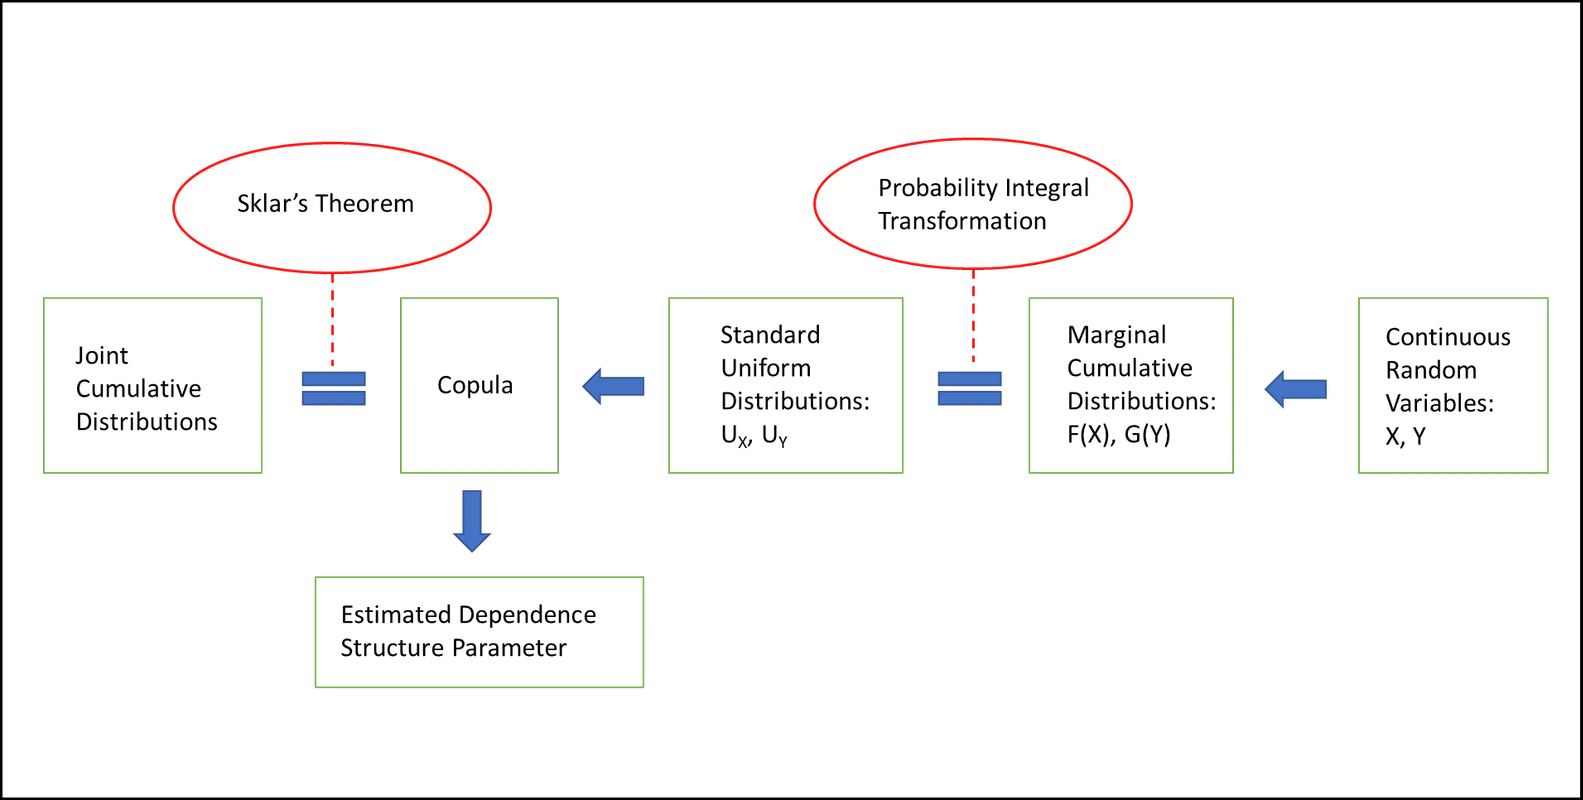


From the above flow chart, we can also see that while estimating a copula model for joint CDF, we also estimate the dependence structure parameter for $X$ and $Y$. 

#### **2.2.4 Invariance under Strictly Monotonic Transformations**

Invariance under strictly monotonic transformation states that:

Let random variables $X$ and $Y$ have continuous marginal CDFs and a copula $C_{XY}$. We also have strictly increasing functions $T_X$ and $T_Y$ and we transform $X$ and $Y$ to $X' = T_X(X)$ and $Y' = T_Y(Y)$. The dependence structure of $X$ and $Y$ and the dependence structure of $X'$ and $Y'$ are the same and $(X,Y)$ and $(X',Y')$ share the same copula $C_{XY}$.

This is a statement about the dependence structure property for a copula. Here is one example:

$$ C_{XY}(X,Y) = C_{XY}(ln(X), exp(Y)) $$ 

We can see that $ln(\cdot)$ and $exp(\cdot)$ are strictly increasing functions; $(X,Y)$ and $(ln(X), exp(Y))$ share the same copula. Because of this property of copulas, we can also say that a copula is scale invariant under strictly increasing functions.

So what is a strictly increasing function? Let's use the following graphs to explain.

In figure 3 below, we show one example of strictly increasing functions. As we can see, as $x$ increases, $f(x)$ increases too. We can use the following math to present the idea:

A function $f(x)$ is a strictly increasing function if $f(b) > f(a)$ for all $b > a$.


**Figure 3: A Strictly Increasing Function Example**

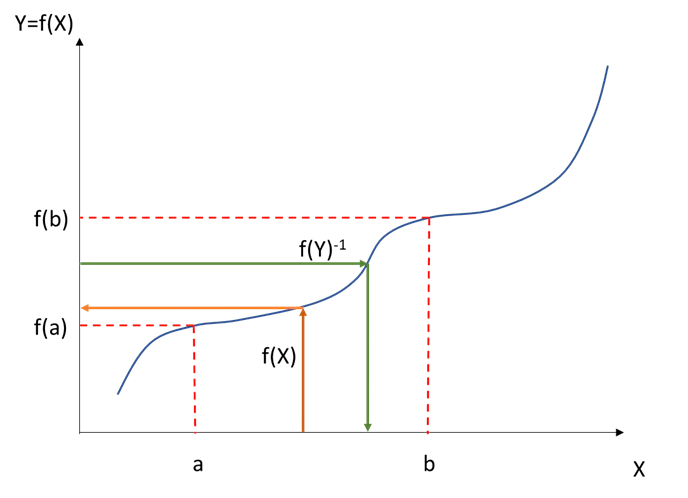


One key point to pay attention to is that there is not $=$ for $f(a)$ and $f(b)$ in the definition. We can see from figure 3, when $X$ increases, $f(X)$ always increases too. $f(X)$ never stays at the same value as $X$ increases. 

Why do we need this specific restriction? It is because we want a one-to-one mapping between $X$ and $Y = f(X)$. Only when we have a one-to-one mapping can we preserve the order of $X$ after the transformation. By using a strictly increasing function to transform data, we can transform the data back and forth, but the order of the data always stays the same. 

We also demonstrate the relationship with brown arrows and green arrows in figure 3. The graph shows that $X$ and $f(X)$ have a one-to-one relationship. For any $X$, you can get a unique $f(X) = Y$. For any $Y$, you can get a unique $f(Y)^{-1} = X$. In figure 4 below, we show an example of a non-strictly increasing function. From figure 4, for a specific $Y$, we cannot get a unique $X$. Actually, for a specific $Y$, we may get multiple $X$s. This is a one-to-many relationship, and a function does not apply for this relationship. Hence, $f(Y)^{-1}$ does not exist in this case.


**Figure 4: A Non-Strictly Increasing Function Example**

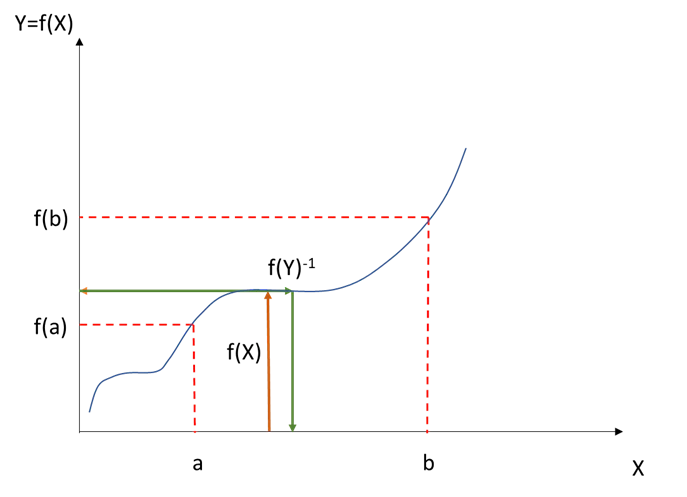


Also, remember that although we have only used two random variables in our lesson so far, we can always extend copula analysis by using more random variables. All the results from the theorems will apply. In the next section, we are going to go over some popular copula properties.


#### **2.2.5 Copula Density Functions**

A copula density function is defined as follows:

$$ c(u,u) = \frac{\partial ^{2}}{\partial u \ \partial u} C(u, u) $$

$f(x,y)$ is the joint density for $X$ and $Y$, $F(x)$ and $G(y)$ are marginals for $X$ and $Y$. And $f(x)$ and $g(y)$ are marginal density functions for $X$ and $Y$. 

By using calculus and chain rules, we can obtain the following relationship:

$$ f(x,y) = c(F(x), G(y)) f(x) g(y) $$

The above result shows us that a joint density function can be expressed as its copula and marginals.


### **2.3 Properties of Copulas**

In this section, we are going to introduce properties of copulas. We will continue to use our bivariate example $X$ and $Y$ in this section.



#### **2.3.1 Bounds of copulas**

Hoeffding and Frechet found that a copula always falls between an upper bound and a lower bound. 

$$ W(u_{1}, \cdots, u_{d}) = max \{1 - d + \sum_{i=1}^{d}u_{i} ,0 \} \le C(\textbf{u}) \le min \{ u_{1},...,u_{d} \} = M(u_{1}, \cdots, u_{d}) $$

$W$ is the Hoeffding and Frechet lower bound, and $M$ is the Hoeffding and Frechet upper bound.

#### **2.3.2 Measures of Dependence**

In last lesson, we discussed Pearson's correlation, the Spearman correlation and Kendall's tau correlation. Since we know that a copula tries to estimate scale-invariant association between random variables, we will restrict out correlation measures to rank correlations: Spearman correlation and Kendall's tau correlation. The reasons we use rank correlations are:

> a. The rank correlation = $0$ when $X$ and $Y$ are monotonically independent  <br>
> b. The rank correlation = $1$ when $X$ and $Y$ are comonotonic <br>
> c. The rank correlation = $-1$ when $X$ and $Y$ are countermonotonic <br>


#### **2.3.3 $X$ and $Y$ are Perfectly Positive Dependent**

When $X$ and $Y$ are increasing functions of each other, or we can say when $X$ and $Y$ are moving monotonically in the same direction, then $X$ and $Y$ are perfectly positive dependent (comonotonicity). $X$ and $Y$ have Kendall's tau = $1$. According to Hoeffding and Frechet bounds, their copula is as follows:

$$ C(U_X, U_Y) = M(U_X, U_Y) = \min(U_X, U_Y) $$



#### **2.3.4 $X$ and $Y$ are Perfectly Negative Dependent**

When $X$ and $Y$ are decreasing functions of each other, or we can say when $X$ and $Y$ are moving monotonically in the opposite direction, then $X$ and $Y$ are perfectly negative dependent (countermonotonicity). $X$ and $Y$ have Kendall's tau = $-1$. According to Hoeffding and Frechet bounds, their Copula is as follows:

$$ C(U_X, U_Y) = W(U_X, U_Y) = \max( U_X + U_Y – 1, 0) $$


#### **2.3.5 $X$ and $Y$ are Perfectly Independent**

When $X$ and $Y$ are perfectly independent, $U_X$ and $U_Y$ are perfectly independent too due to invariance under monotonic transformation. Copula of $U_X$ and $U_Y$ can be as follows:

$$ C(U_X, U_Y) = U_X \cdot U_Y $$

#### **2.3.6 Tail Dependence**

**Tail dependence** is to investigate the correlation of random variables when one random variable is approaching to the extreme level. There are upper-tail dependence and lower-tail dependence, which we can analyze. Let's use two continuous random variables $X$ and $Y$ as an example to define **upper-tail dependence** and **lower-tail dependence**.

> **Upper-Tail Dependence Coefficient:**
$\lambda_{u}$: The probability that $X$ will approach its extreme high values given that $Y$ is already approaching its extreme high values
>
> **Lower-Tail Dependence Coefficient:**
$\lambda_{l}$: The probability that $X$ will approach its extreme low values given that $Y$ is already approaching its extreme low values.

The coefficients are between $0$ and $1$ since they are probabilities. When they are $0$, it means $X$ and $Y$ are upper tail asymptotically independent or lower tail asymptotically independent. The term asymptotically independent comes from extreme value analysis, which is beyond the scope of this course.


## **3. Commonly Used Copulas**

In this section, we are going to introduce commonly used copulas. We will divide these copulas into two groups: One group is **elliptical copulas**, which includes the **normal copula** and **Student's t-copula**. The other group is **Archimedean copulas**, which includes **Clayton** and **Gumbel** copulas. We will use bivariate copulas with continuous random variables $X$ and $Y$ as an example.


### **3.1 Elliptical Copulas**

The **Normal (Gaussian) copula** and **Student's t-copula** are two copulas in the elliptical copula family. 

**Gaussian Copula:**

> Bivariate Copula: $C_{\rho} (U_x, U_y)= \Phi_{\Sigma}( \Phi^{-1}(U_x), \Phi^{-1}(U_y))$
>
> Parameter: $\rho$ = Pearson Correlation where $\rho \in [-1, 1]$

$\Sigma$ is a 2-by-2 matrix with $1$ on the diagonal and $\rho$ off the diagonal. $\Phi^{-1}$ is the inverse of the cumulative function of standard normal distribution. $\Phi_{\Sigma}$ is the cumulative function of a bivariate normal distribution with mean = $0$ and correlation = $\Sigma$.

The relationship between the Gaussian copula's parameter $\rho$ and Kendall's tau is as follows:

$$ \rho(X,Y) = \sin \Big(\frac{\pi}{2} \tau \Big) $$


**Student's t-Copula:**

> Bivariate Copula: $C_{u,\Sigma} (U_x, U_y) = t_{u,\Sigma} ( t^{-1}_{u} (U_x), t^{-1}_{u} (U_y))$
>
> Parameter: $\rho$ = Pearson Correlation  where $\rho \in [-1,1]$ and $u$ = Degree of Freedom 

$\Sigma$ is a 2-by-2 matrix with $1$ on the diagonal and $\rho$ off the diagonal. $t^{-1}$ is the inverse of the cumulative function of univariate Student's t-distribution. $t_{u,\Sigma}$ is the cumulative function of a bivariate Student's t-distribution with degree of freedom = $u$ and correlation = $\Sigma$.

When the degree of freedom $u$ gets large, the Student's t-distribution will converge to Gaussian distribution. The relationship between the Student's t-copula parameter $\rho$ and Kendall's tau is as follows:

$$ \rho(X,Y) = \sin \Big(\frac{\pi}{2} \tau \Big) $$



**Figure 5: Copula Densities for Gaussian Copula vs. Student's t-Copula with $\rho = 0.3$ and df $= 2$**


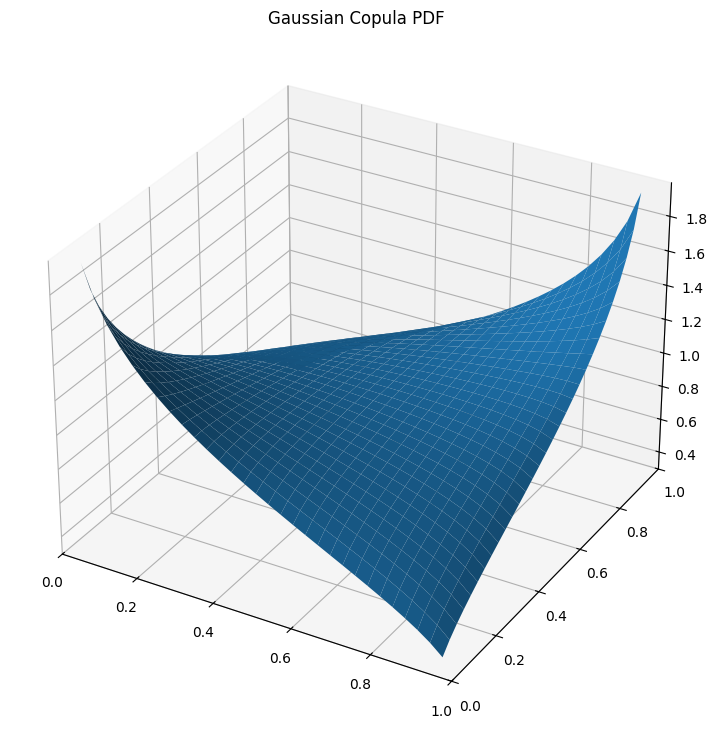

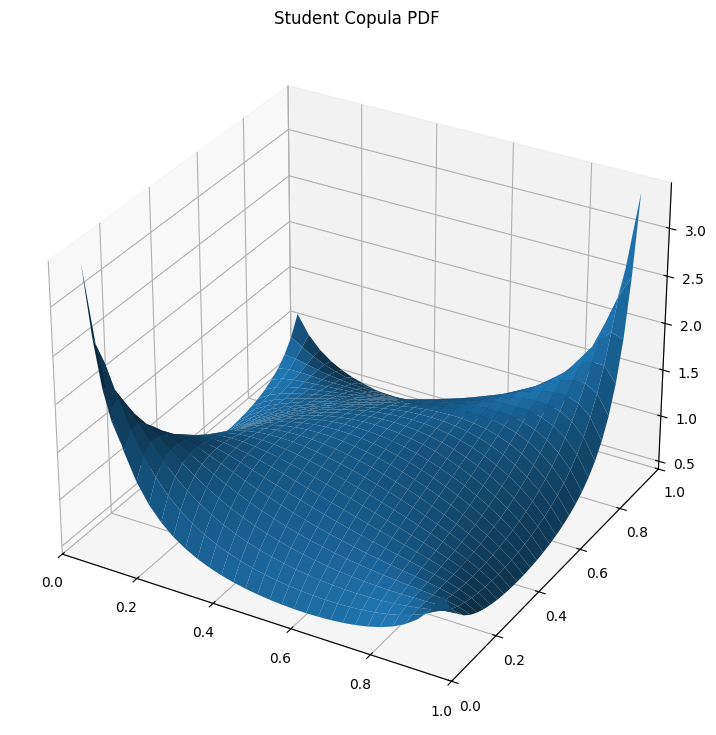

In [3]:
# Gaussian Copula vs. Student's t-Copula
pycop.gaussian().plot_pdf([0.3, 2], plot_type="3d", Nsplit=30)
pycop.student().plot_pdf([0.3, 2], plot_type="3d", Nsplit=30)

From figure 5, we draw the copula density functions for both a Gaussian copula and Student's t-copula with a Pearson correlation = 0.3 and degrees of freedom = 2 (for Student's t-copula). We can see that both copulas have a similar pattern in the middle, but in the Student's t-copula, the four corners are higher. It means that the Student's t-copula has more extreme cases than the Gaussian copula. It shows that the Student's t-copula has both upper-tail dependence and lower-tail dependence whereas the Gaussian copula is asymptotically independent for both upper- and lower-tail dependence. 


### **3.2 Archimedean Copulas**

Another popular Copula group among researchers is **Archimedean copulas**. Archimedean copulas have an explicitly defined copula formula and math properties that we can manipulate. An Archimedean copula is defined as follows:

$$ C(u_x, u_y) = \varphi^{-1} (\varphi(u_x) + \varphi(u_y)) $$

Where $\varphi$ is a decreasing function mapping $[0,1]$ to $[0, \infty)$

$\varphi$ is called the generator of Archimedean Copula. With different $\varphi$, we can create different copulas. We will go through two common ones: Clayton and Gumbel copulas.

**Clayton Copula:**

> Bivariate Copula: $C_{\theta} (u_x, u_y) = [\max (u_x^{-\theta} + u_y^{-\theta} -1; 0) ]^{\frac{-1}{\theta}} $
> 
> Parameter: $\theta$ where $\theta \in [-1,\infty)$ without $0$
>
> Generator: $\phi(u) = \frac{1}{\theta} (\theta^{-1}-1)$

The relationship between Clayton Copula's parameter $\theta$ and Kendall's-tau is as follows:

$$ \theta = \frac{2\tau}{1 - \tau} $$

From the above formula, we know as $\theta \to 0$, a Clayton copula turns into an independence copula. As $\theta \to \infty $, a Clayton copula turns into a comonotonic copula. As $\theta = -1$, a Clayton copula reaches the Hoeffding and Frechet lower bound.

**Gumbel Copula:**

> Bivariate Copula: $ C_{\theta}(u_x, u_y)=\exp [-((-\ln u_x)^{\theta} + (-\ln u_y)^{\theta})^{\frac{1}{\theta}} ]$
>
> Parameter: $\theta$ where $\theta \in [1,\infty )$
>
> Generator: $ \phi(u) = (-\ln u)^{\theta}$

The relationship between a Gumbel copula's parameter $\theta$ and Kendall's tau is as follows:

$$ \theta = \frac{1}{1 - \tau} $$

When $\theta = 1$, a Gumbel copula becomes an independence copula. As $\theta \to \infty$ a Gumbel copula turns into a comonotonic copula.


**Figure 6: Copula Densities for Clayton Copula and Gumbel Copula with $\theta = 2$**


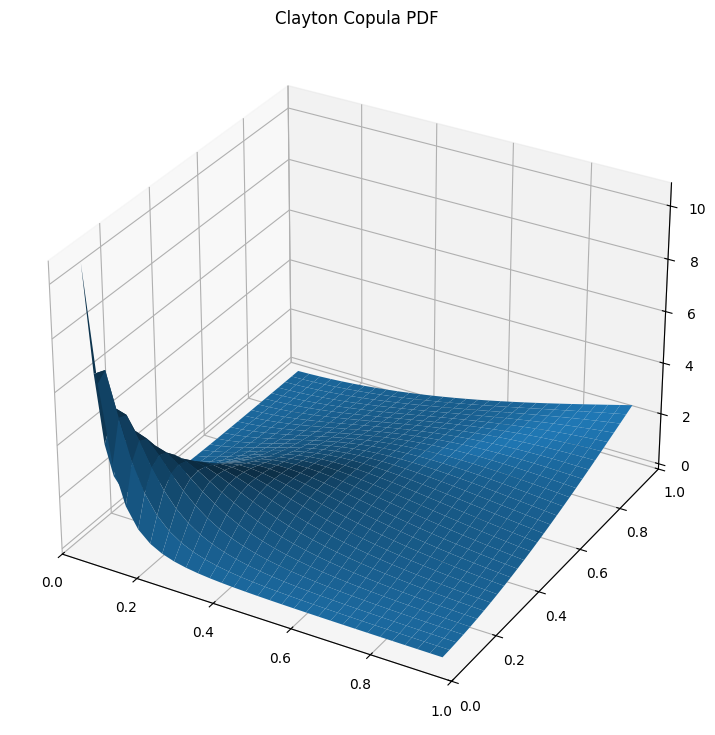

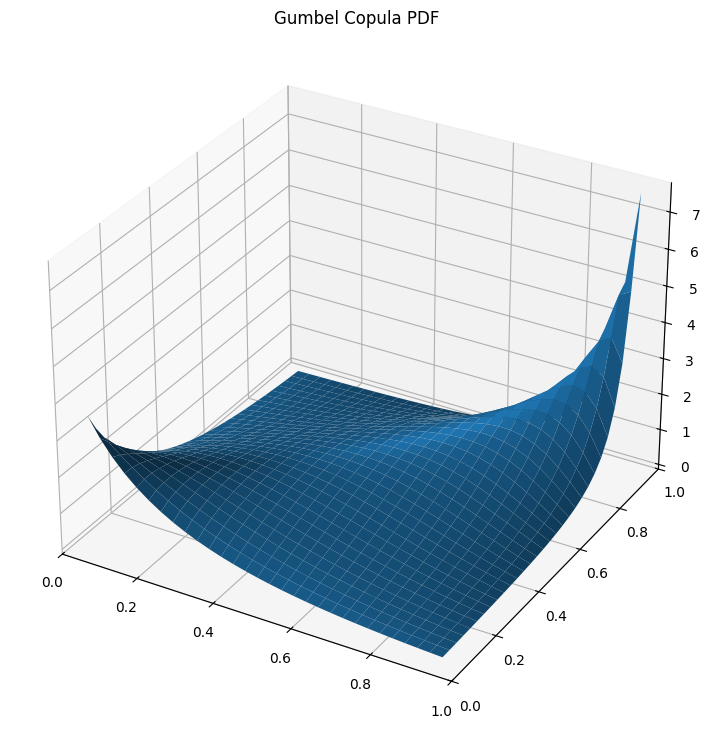

In [4]:
# Clayton Copula and Gumbel Copula
pycop.archimedean(family="clayton").plot_pdf([2], plot_type="3d", Nsplit=30)
pycop.archimedean(family="gumbel").plot_pdf([2], plot_type="3d", Nsplit=30)

In figure 6, we have copula densities for Clayton and Gumbel copulas. We can see Clayton has a high tail near $(0,0)$ while Gumbel has a high tail at $(1,1)$. According to the graphs, Clayton has lower-tail dependence, and Gumbel has upper-tail dependence. Both Clayton and Gumbel are one-tail dependence Copulas. This is important in finance because there are asset returns that exhibit many negative extreme value cases. Clayton copulas can be a good choice for modeling this phenomenon.


## **4. Example: Joint Distribution for Stock Market Index Returns and Treasury Yield Return**

In this section, we are going to use a copula to find a joint distribution function for Dow Jones Industrial Average daily returns and U.S. 10-Year Treasury Bond Yield daily return. Let's look at the scatter plot first.


**Figure 7: Scatter Plot for Dow Jones Industrial Average Daily Return and U.S. 10-Year Treasury Bond Yield Daily Return**


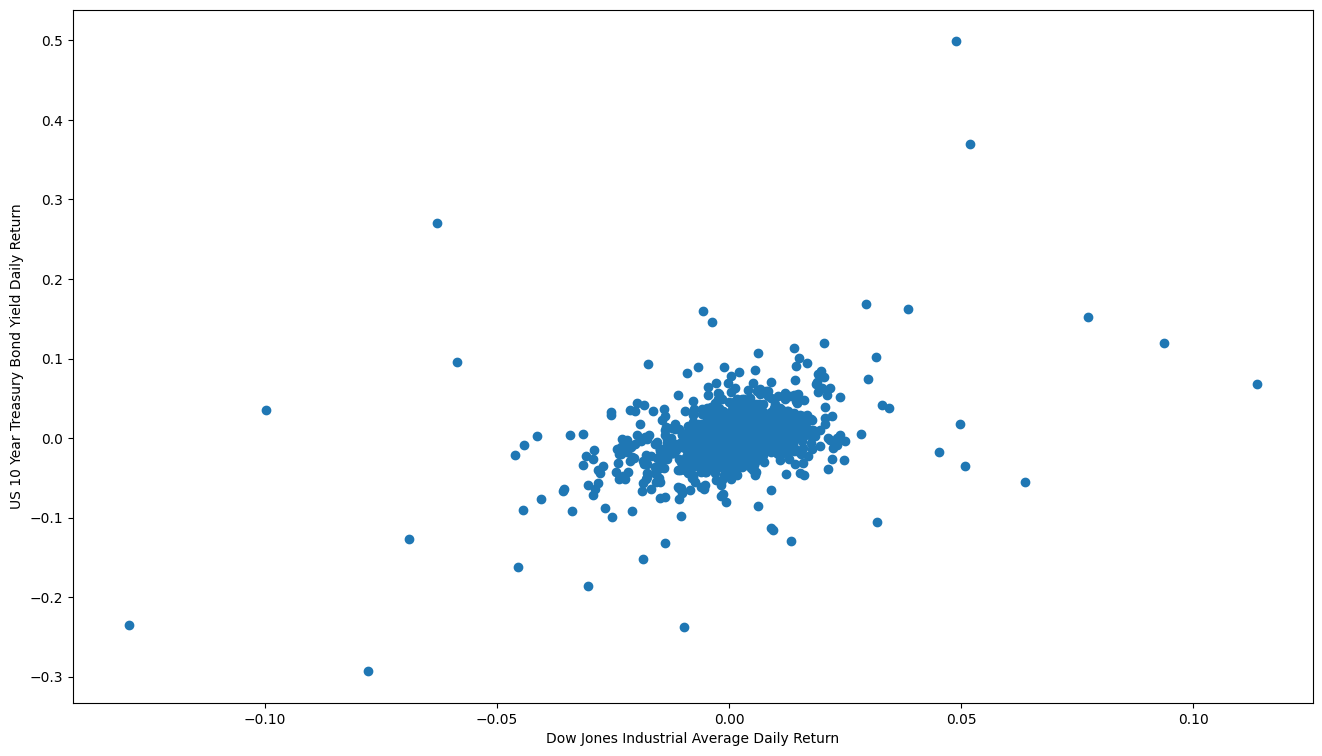

In [5]:
# Scatter Plot for DWJ and 10Y_TBY
plt.scatter(data_set["DWJ"], data_set["10Y_TBY"])
plt.xlabel("Dow Jones Industrial Average Daily Return")
plt.ylabel("US 10 Year Treasury Bond Yield Daily Return")
plt.show()

From figure 7, we can see the two variables are mildly positive correlated. Their Kendall's tau is 0.24.

From previous lessons, we know that daily returns do not exhibit normal distribution characteristics. Our data exhibits some heavy tails on both the lower and upper sides. A Student's t-copula seems to be a good candidate since this copula also has heavy tails on both sides. But we need a more formal method for selecting the copula function. Fortunately, the statistical application used here can conduct copula model selection automatically as shown in next figure. The result suggested by the application is to use Student's t-copula for our data. 

Our next step before fitting a Student's t-copula model is to transform the data. We know from the theory that we need to transform our data to become standard and uniformly distributed. After having transformed the data, we can now fit the Student's t-copula model. Here is the summary of the model fit.


**Figure 8: Student's t Model Result for Dow Jones Industrial Average Daily Return and U.S. 10-Year Treasury Bond Yield Daily Return**


In [6]:
# Identifying copula subclass from family of univariate copulas

# Fit GaussianMultivariate copula and estimate parameters
data = pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T
dist = GaussianMultivariate()
dist.fit(data)
parameters = dist.to_dict()

# print covariance matrix
print(
    "correlation : ",
    pd.DataFrame(
        parameters["correlation"],
        index=parameters["columns"],
        columns=parameters["columns"],
    ),
)

# print df/loc/scale parameters and copula subclass type
print(
    "- - - - - - - - - - - - - - -Parameters : ",
    pd.DataFrame(parameters["univariates"], index=parameters["columns"]),
)

correlation :                DWJ   10Y_TBY
DWJ      1.000000  0.369284
10Y_TBY  0.369284  1.000000
- - - - - - - - - - - - - - -Parameters :                 df       loc     scale  \
DWJ      2.071275  0.000959  0.005320   
10Y_TBY  2.476938 -0.000266  0.017414   

                                                    type  
DWJ      copulas.univariate.student_t.StudentTUnivariate  
10Y_TBY  copulas.univariate.student_t.StudentTUnivariate  


In [7]:
print(parameters.keys())

dict_keys(['correlation', 'univariates', 'columns', 'type'])


The above results suggest Student's t-copula is best fit so we proceed with fitting Student's t-copula model.


In [8]:
# Fit student copula and estimate df and rho parameters
result = copulae.elliptical.student.StudentCopula(df=2).fit(
    data, method="ml", fix_df=True
)
print("- - - - - - - - - - - - - - -df and rho parameters : ", result.params)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
- - - - - - - - - - - - - - -df and rho parameters :  StudentParams(df=np.float64(4.669), rho=array([0.3957575]))


From figure 8, we can see the two estimated parameters. The First one is the degree of freedom. The second one 'rho' is the dependence parameter. In this model, the estimated rho is 0.3957575. We can use the parameter–rho conversion formula for Student's t-copula in section 3.1 to obtain Kendall's tau. The estimated Kendall's tau is 0.24, the same as we obtained from the original data.
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

Next, we are going to do some tests to check for model goodness-of-fit. We selected a normal copula, Student's t-copula, Clayton copula, and Gumbel copula to run the test. Figure 9 shows the results.

The goodness-of-fit statistic for the class of copula compares the empirical copula against a parametric estimate of the copula derived under the null hypothesis. Given the pseudo-observations $ U_{ij} \forall i = 1, \cdots, n; j = 1, \cdots, d $ and the empirical copula given by 
    
$$ C_n (\textbf{u}) = \frac{1}{n} \sum^n_{i=1} \textbf{I} (U_{i1} \leq u_1, \cdots, U_{id} \leq u_d) $$
    
where $\textbf{u} \in [0, 1]^d$, the null hypothesis, $H_0$ thus tests if
    
$$ C \in C_0 $$
    
where $C_0$ is the true class of the copulae under $H_0$. The test statistic $T$ is defined as
    
$$ T = n \int_{[0, 1]^d} [C_n(\textbf{u}) - C_{\theta_n}(\textbf{u})]^2 dC_n(\textbf{u}) $$
    
where $ C_{\theta_n} (\textbf{u})$ is the estimation of $C$ under $H_0$.
    
The approximate $p$-value is then given by:
    
$$  \frac{\sum^M_{k=1}\textbf{I}(|T_k| \geq |T|)}{M} $$


**Figure 9: Kendal-tau and Goodness-of-Fit for Normal Copula, Student's t-Copula, Clayton Copula, and Gumbel Copula**


In [9]:
# Kendal tau comparisons

# Obtain Transformed (pseudo observations) sample
var_dwj = pseudo_obs(data_set["DWJ"])
var_tb10y = pseudo_obs(data_set["10Y_TBY"])
data = pd.DataFrame([var_dwj, var_tb10y]).T
data.columns = ["var_dwj", "var_tb10y"]

# Obtain Simulated Data
result = copulae.elliptical.student.StudentCopula(df=2).fit(
    data, method="ml", fix_df=True
)
u = result.random(1507, seed=12345)

# Kendal tau - original data
kendal_o = kendalltau(data_set["DWJ"], data_set["10Y_TBY"])
print("Kendal tau for original data")
print(
    "Kendall correlation : ",
    kendal_o.correlation,
    "Kendall p value     : ",
    kendal_o.pvalue,
)

# Kendal tau - synthesized sample
kendal_t = kendalltau(var_dwj, var_tb10y)
print("Kendal tau for synthesized sample")
print(
    "Kendall correlation : ",
    kendal_t.correlation,
    "Kendall p value     : ",
    kendal_t.pvalue,
)

# Kendal tau - simulated data
kendal_s = kendalltau(u.iloc[:, 0], u.iloc[:, 1])
print("Kendal tau for simulated data")
print(
    "Kendall correlation : ",
    kendal_s.correlation,
    "Kendall p value     : ",
    kendal_s.pvalue,
)

           var_dwj    var_tb10y
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
Kendal tau for original data
Kendall correlation :  0.23986070670687398 Kendall p value     :  3.225836073521243e-44
Kendal tau for synthesized sample
Kendall correlation :  0.23986070670687398 Kendall p value     :  3.225836073521243e-44
Kendal tau for simulated data
Kendall correlation :  0.27498499697295753 Kendall p value     :  1.410559065283542e-57


In [10]:
# GaussianCopula fitmetrics
gaus_cop = GaussianCopula().fit(
    pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T, method="ml"
)
gaus_cop_ll = gaus_cop.log_lik(pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T)
gaus_cop_gof = gof_copula(
    copula=GaussianCopula,
    data=pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T,
    reps=1,
)

print(gaus_cop)
print("The covariance parameters : ", gaus_cop.params)
print("The covariance matrix :", gaus_cop.sigma)
print("Log likelihood (LL) : ", gaus_cop_ll)
print("", gaus_cop_gof)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  [0.36971151]
The covariance matrix : [[1.         0.36971151]
 [0.36971151 1.        ]]
Log likelihood (LL) :  109.21611542923105
 Goodness-of-Fit statistics
Method     : Parametric bootstrap-based goodness-of-fit of Gaussian with Sn
Parameter  : [0.36971151]
Statistic  : 0.067799045
P-Value    : 0.25


In [11]:
# StudentCopula fitmetrics
st_cop = StudentCopula().fit(
    pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T, method="ml"
)
st_cop_ll = st_cop.log_lik(pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T)
# st_cop_gof = gof_copula(copula=StudentCopula, data=pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T, reps=1)

print(st_cop)
print("The covariance parameters : ", st_cop.params)
print("The covariance matrix :", st_cop.sigma)
print("Log likelihood (LL) : ", st_cop_ll)
# print('', st_cop_gof) ##Not implemented

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  StudentParams(df=np.float64(1.426192497433476e-10), rho=array([0.37029214]))
The covariance matrix : [[1.         0.37029214]
 [0.37029214 1.        ]]
Log likelihood (LL) :  32347.38436857751


In [12]:
# ClaytonCopula fitmetrics
cl_cop = ClaytonCopula().fit(
    pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T, method="ml"
)
cl_cop_ll = cl_cop.log_lik(pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T)
cl_cop_gof = gof_copula(
    copula=ClaytonCopula,
    data=pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T,
    reps=1,
)

print(cl_cop)
print("The covariance parameters : ", cl_cop.params)
# print('The covariance matrix :', cl_cop.sigma) ##Not implemented
print("Log likelihood (LL) : ", cl_cop_ll)
print("", cl_cop_gof)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  0.5879553410302689
Log likelihood (LL) :  125.11848541324596
 Goodness-of-Fit statistics
Method     : Parametric bootstrap-based goodness-of-fit of Clayton with Sn
Parameter  : 0.5879553410302689
Statistic  : 0.106061625
P-Value    : 0.75


In [13]:
# GumbelCopula fitmetrics
gumb_cop = GumbelCopula().fit(
    pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T, method="ml"
)
new_data = np.array(pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T)
gumb_cop_ll = gumb_cop.log_lik(new_data,to_pobs=True, ties='average')
gumb_cop_gof = gof_copula(
    copula=GumbelCopula,
    data=pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T,
    reps=1,
)

print(gumb_cop)
print("The covariance parameters : ", gumb_cop.params)
# print('The covariance matrix :', gumb_cop.sigma) ##Not implemented
print("Log likelihood (LL) : ", gumb_cop_ll)
print("", gumb_cop_gof)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  1.3192097974315677
Log likelihood (LL) :  124.49942782189672
 Goodness-of-Fit statistics
Method     : Parametric bootstrap-based goodness-of-fit of Gumbel with Sn
Parameter  : 1.3192097974315677
Statistic  : 0.136252685
P-Value    : 0.75


Let's observe the log likelihood (LL) of the selected copulas for our given data. The greater the LL (closer to $\infty$) the better. Based on our results LL of 188.438 for StudentCopula outperforms other copulas and indicates that StudentCopula is the best option.



Now let's random sample or simulate data points from a new joint distribution derived from a copula and compare them to our observed data.


**Figure 10: Comparison of Transformed Observed Data and Simulated Data from Copula**


In [ ]:
# Comparison of Transformed Observed Data and Simulated Data from Copula
plt.figure(figsize=(16, 12))

# Plot Transformed Data
ax1 = plt.subplot(221)
plt.scatter(data.var_dwj, data.var_tb10y)
plt.xlabel("DWJ")
plt.ylabel("TB10Y")
plt.title("Transformed Data")

# Plot Simulated Data
ax3 = plt.subplot(223)
plt.scatter(u.var_dwj, u.var_tb10y, c="coral", alpha=0.8)
plt.xlabel("DWJ")
plt.ylabel("TB10Y")
plt.title("Simulated Data")

# Plot Transformed-Simulated Data
ax2 = plt.subplot(222)
plt.scatter(data.var_dwj, data.var_tb10y)
plt.scatter(u.var_dwj, u.var_tb10y, c="coral", alpha=0.8)
plt.xlabel("DWJ")
plt.ylabel("TB10Y")
plt.title("Transformed-Simulated Data")
plt.show()

From figure 10, we drew scatter plots from transformed observed data and from simulated data and overlaid them. From the scatter plots on the left, we can see that transformed data or simulated data alone have a slightly higher concentration of data on the lower left corner and upper right corner. It indicates that the Student's t-copula captures the observed data pattern around the tails. The overlaid scatter plot on the right gives us some idea of how the two sets of data points match. 


## **5. Caution on Using Copula**

We have demonstrated how powerful a copula is for data analysis. Copulas are a very general technique for modeling random variable dependence structure. This kind of generality also creates some issues. Now, let's look at the issues we need to pay attention to when using copulas.


### **5.1 Static Dependence**

The measure of dependence applied to copula is static, meaning it does not change as time or leadership changes. Hence, it is important to conduct exploratory data analysis and check the correlation in different time periods before running any copula model.


### **5.2 Questionable Marginal CDF Selection**

Because of the invariant property of copulas under monotonic transformation, marginal CDFs can change while the dependence structure stays the same for a copula. We know the joint distribution of normal random variables is a multivariate normal distribution from basic statistics. However, from a copula, we can create non-normal marginals for a multivariate normal distribution with the same dependence structure. For example, by using a copula, we can obtain a gamma marginal distribution and beta marginal distribution from a multivariate normal distribution. This practice is questionable, so we should check and have a good reason for using this practice.


### **5.3 Convenient Copula Function Selection Without Data Support**

Many people blame the use of normal copula as the cause of the 2008 financial crisis. The model didn't predict the domino effect on mortgage market default. However, we now know that the normal copula does not model tail dependence. The Student's t-copula or Clayton copula would be a better choice to incorporate heavy tail modeling. We understand that normal copula have nice mathematical tractability, but this reason alone is not sufficient for selecting a normal copula function for modeling when it does not model the heavy tails. That's why it is important to conduct a goodness-of-fit process when using copulas.


## **6. Shiny Application for Copula Model**

In this module, we provide a Shiny application to build a Student's t copula model. The application also gives a data summary to let you know what variables are available in the application. 

[Click here to access the application.](https://worldquantuniversity.shinyapps.io/3FE-Module-3-Lesson-4/?_ga=2.122906699.1981594217.1661291782-1173458961.1656095235) You first choose two variables (X variable and Y variable) to build the Student's t copula model. The X and Y data summary tab will show the scatter plot for the two variables and their correlation metrics. The X and Y normality test tab will show the QQ plots for the two variables. The last two tabs give us the copula model result and comparison graph for both the original data and simulated data.

## **7. Conclusion**

In this lesson, we first talked about joint probability distribution and marginal probability distribution. We then introduced copula functions as a link between joint probability distribution and marginal probability distribution. We discussed the definition, properties, and common types of copula functions. We demonstrated how to use a copula to find the joint probability distribution for two asset returns. We finished up with a brief discussion of what areas to pay attention to when using copulas. 

This lesson also concludes Module 3. In Module 3, we took a break from regression analysis and went over several topics on random variables and their probability distribution functions. In the next module, we will go back to regression analysis and explore the situation where data points from the same variable are correlated.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
